<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/2d_compare_ALL_top_bottom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz[pd_elc_plane_bottom_24_MHz.columns[::-1]]
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz[pd_elc_plane_bottom_500_KHz.columns[::-1]]
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz[pd_mag_plane_bottom_24_MHz.columns[::-1]]

pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz

plane_list = []

plane = { 
  'name': 'Lucas: elc_plane_bottom_24_MHz',
  'url': url_elc_plane_bottom_24_MHz,
  'pd': None,
  'np': None  
}

plane_list.append(plane) 
plane_list.append(plane)
plane_list.append(plane) 
plane_list.append(plane)
plane_list.append(plane) 



In [0]:
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

for plane in plane_list:
  plane['pd'] = pd.read_csv(plane['url'], names=columns_name)
  
  # Espelhar matriz - eixo y
  plane['pd'] = plane['pd'][plane['pd'].columns[::-1]]
  
  # -dB
  plane['np'] = -plane['pd'].values

---
##  Plot 2d: Global Config

In [0]:
cube_range = (0, 13)

plot_layout = (2, 2)

gap_layout = (5.5,1,1,9) # (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

global_scale = (10, -60)

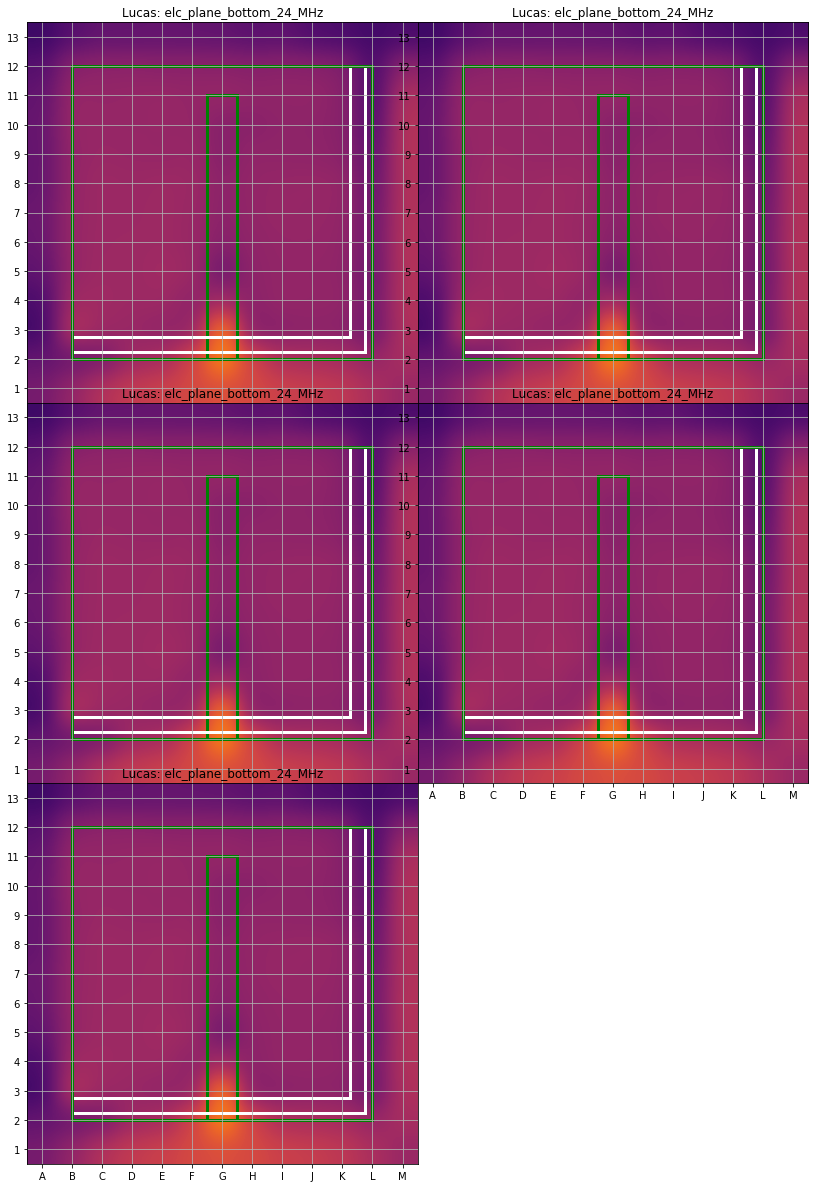

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

#=============================================================================== 
subplot_nrows = int(len(plane_list)/2)+int(len(plane_list)%2)
subplot_ncols = 2

fig = plt.figure(figsize = (14, subplot_nrows*7))

ax = [fig.add_subplot(subplot_nrows, 
                      subplot_ncols, 
                      index+1) 
      for index in range(len(plane_list))]

for index, plane in enumerate(plane_list):
  
  ax[index].imshow(plane['np'],
                   interpolation ='gaussian', 
                   cmap ='inferno',
                   vmax = global_scale[0],
                   vmin = global_scale[1])
  
  ax[index].set_title(plane['name'])
  
  ax[index].set_xlim([cube_range[0] - .5, cube_range[1] - .5])
  ax[index].set_ylim([cube_range[0] - .5, cube_range[1] - .5])

  ax[index].set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
  ax[index].set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

  ax[index].xaxis.set_major_formatter(xticks_formatter)
  ax[index].yaxis.set_major_formatter(yticks_formatter)

  ax[index].grid(True)
  
  ax[index].set_aspect('auto')
  
  # ------------------------------------------------------------------------------
  # EUT Layout
  gap = patches.Rectangle(np.array(gap_layout[:2]),
                          gap_layout[2],
                          gap_layout[3],
                          linewidth=3,
                          edgecolor='g',
                          facecolor='none')
  ax[index].add_patch(gap)

  L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
  L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
  ax[index].add_patch(L)

  edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
  ax[index].add_patch(edge)
  
fig.subplots_adjust(wspace=0, hspace=0)